# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


Linear regression, uses a linear function to associate input x to input y in the form
of ax+b=y. Polynomial uses a polynomial function to map more complex associations that don't usually fit very well with just a linear function.

Overfitting and underfitting describe the relationship of our fit to the data we've been given. Overfitting implies that our fit is too specific and fails to generalize to different forms of data. Underfitting is the exact opposite, our fit doesn't take on enough form to capture enough information and therefor fails to identify a trend in the data.


### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

Logisitic Regression is technique that uses probability to determine the likelyhood that an input that belongs to a certain class. Using a sigmoid function to bound the results between 0 and 1, we define a boundary such that all results with probability greater than a certain threshhold are classified as 1 and anything below is classified as 0.

SVM is a technique that plots a hyperplane in between the data and tries to create a distinct seperation betwen different classes of data. To perform this, the svm takes the distance measured from the plane to the points (Margin) and tries to position the hyperplane in a manner that equally maximizes the margin in between all classes of data. 

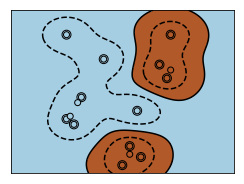

In [88]:
# Our dataset and targets
# Taken from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
from sklearn import svm

X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

# figure number
fignum = 1

# fit the model
kernel="rbf"
clf = svm.SVC(kernel=kernel, gamma=2)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum, figsize=(4, 3))
plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
fignum = fignum + 1
plt.show()

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

Supervised learning presents the idea of defining a relationship between input and output when given data that is all labelled. i.e)Classic Mnist dataset, images are accompanied by a label to indicate what number it actually it.

Unsupervised learning orients itself around data without labels and derives if theres any structure. i.e) Single Audio file capturing room of people talking with a band playing, isolate structure in the data: One would be people talking, the other would be the band.

K-NN doesnt really have a training phase where it consumes all historical data, develops a hypothesis and is fed an input to classify. It essentially iterates as much as it has to so for a given situation whenever it is presented a new set of information so that it can classify x amount of groups. For example, let's say we want to see what trends there are on youtube videos. If we had an "eager" algorithm, our model would just train off the current data and try to classify all future trends. This won't work because trends change all the time and so our model would go out of date very quickly. Using a lazy learning algorithm such as KNN, it would simply iterate to find new groups whenever new trends are presented.


### KNN steps: 
* 1)Take in K number of clusters and training set. 
* 2) Randomly initialize the K cluster centroids.
* 3) For each centroid, classify the surrounding data points closest to a particular centroid as a type that belongs to that centroid.
* 4) Compute the average of all points under a certain centroid type and move the centroid to that average point, repeat for all centroids
* 5) Repeat process starting from step 3 and continute until you have your groups

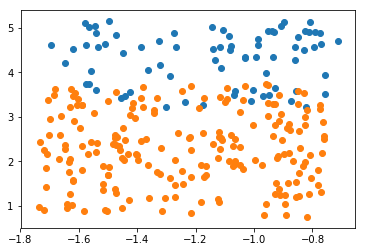

In [124]:
x1 = np.random.rand(1,75)-1.7
y1 = np.random.rand(1,75)*2+3.2

x2 = np.random.rand(1,200)-1.75
y2 = np.random.rand(1,200)*3+0.75


plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()


### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [76]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score


# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

dist = []

X = iris_df.iloc[:,0:4].values
Y = iris_df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.6,random_state=69)

In [77]:
def predict(X_train, Y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        # first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        # add it to list of distances
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(Y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

def kNearestNeighbor(X_train, Y_train, X_test, predictions, k):
    # predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(predict(X_train, Y_train, X_test[i, :], k))

predictions=[]
kNearestNeighbor(X_train, Y_train, X_test, predictions, 3)
predictions = np.asarray(predictions)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions) * 100
print('\nThe accuracy of the classifier is %d%%' % accuracy)


The accuracy of the classifier is 40%


Bagging is used to decrease variance by generating new data originating from your training set. You would use this technique in a case where you would have results that have high predictive variance.

Boosting is taking the output from a multitude of different models and combining them. The goal is to use a weight system to take advantage of all the pros and cons of the different models for a given situation.

### Decision Tree
A decision tree is structure that aims to present solutions that are determined given a set of conditions. 

#### Pros:
* Easy to interpret and straightfoward to visualize
* Can handle continuous and categorical attributes
* Not influenced by outliers

#### Cons:
* Can overfit
* Can deliver local optimal solutions not global
* One small change in data can lead to a large change in structure
 

### Random Forest
A random forest tree is actually a collection of multiple decision trees. It takes multiple decision trees and avergages them together to get better results.

#### Pros:
* Perform better than regular decision trees
* Can handle a lot of input
* Not influenced by outliers

#### Cons:
* Not easy to interpret
* Can overfit with noisy data
* imbalanced data leads to poor performance


### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

PCA is a technique that strives to simplify the complexity of our data while retaining all the key information we need. (i.e scaling down the size of mnist images but maintaining the image layout). 


1) To do this, we subtract the mean from all points.
2) Once done, calculate the covariance matrix.
3) Find the eigenvectors of the covaiance matrix and identify the properties that you want

The eigenvectors and eigenvalues are used to create the lower dimension representation of the data that you are trying to scale down.

Subtracting the mean makes the calculation of the covariance matrix a lot simpler.


Autoencoders are a type of neural network that have a feedback connection in order to retain features from the past to take into consideration when looking at a present input.



### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [19]:
# loading the faces dataset
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


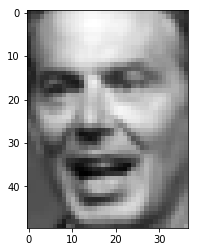

In [20]:
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')


Fitting the classifier to the training set


/home/twong/TyDev/Repos/mais-bootcamp-w2019/.venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


done in 6138.733s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.108s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.58      0.67        50
     Colin Powell       0.73      0.74      0.74       138
  Donald Rumsfeld       0.79      0.71      0.74        78
    George W Bush       0.79      0.92      0.85       312
Gerhard Schroeder       0.79      0.61      0.69        67
      Hugo Chavez       0.87      0.66      0.75        41
       Tony Blair       0.80      0.75      0.77        87

        micro avg       0.78      0.78      0.78       773
        macro avg       0.79      0.71      0.74       773
     weighted avg       0.78      0.78      0.78       773

[[ 

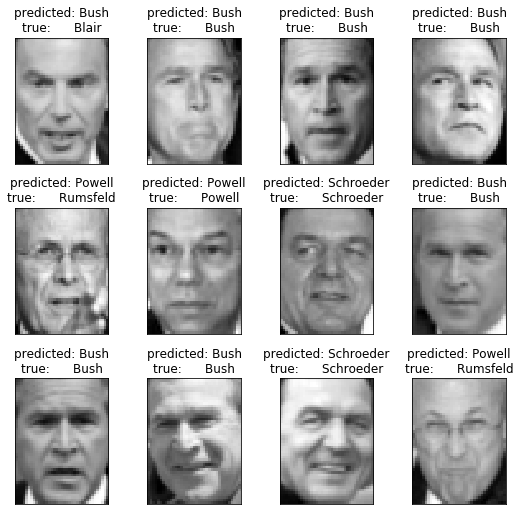

In [44]:

# Work based off https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6)



n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)

clf = clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


def plot_gallery(images, titles, n_row, n_col):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
        



# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, 3, 4)

# # plot the gallery of the most significative eigenfaces

# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles,3,4)

# plt.show()

## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

